# Tutorial 1 : Suspended weight

This is the first of a series of tutorials. In this tutorial we will model a weight hanging from a support-point via an elastic cable.

Learning points:

- Starting a new Scene
- Adding a Rigid body, points and a cable
- Plotting the result
- Getting numerical results

It helps if you know python (the programming language) but this tutorial should be possible to follow without.


## Step 0

These two lines are always the same. They basically load the program.

The first line tells python to import everything ( \* ) from DAVE.

The second line instructs python to import everything from the DAVE.jupyter package as well. This part of DAVE contains functionality to work with jupyter lab


In [1]:
from DAVE import *
from DAVE.jupyter import *

Equilibrium-core version = 2.1
default resource folders:
c:\python\miniconda3\envs\book\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
C:\data\Dave\Book\DAVE-book\DAVE-notebooks
Blender found at: C:\Program Files\Blender Foundation\Blender 2.93\blender.exe
embedWindow(verbose=True): could not load ipyvtk_simple try:
> pip install -U git+https://github.com/Kitware/ipyvtk-simple.git


## Step 1

Before we can model anything we need to create a "Scene". A Scene is place to build a model. Other software may call it a world, model or scenario or file. But we call it scene.

To create a new scene we use the Scene() command. This creates a new Scene and gives us a reference to it. We need this reference (name) to do anyhting with the scene, so we store it in a variable. As default we use "s".

Tech: Scene is a *"class"* (blueprint) and calling it invokes its *constructor*. The constructor builds an *instance* (object) based on that class. The object is erected somewhere in the memory of the computer. To know where to find it the constructor gives a *reference* with the adress of thing that was build. We store that adres in a *variable* with *name* s.

In [2]:
s = Scene()

We can plot the world to see that it is empty. We use the *show* function which was imported from DAVE.jupyter.

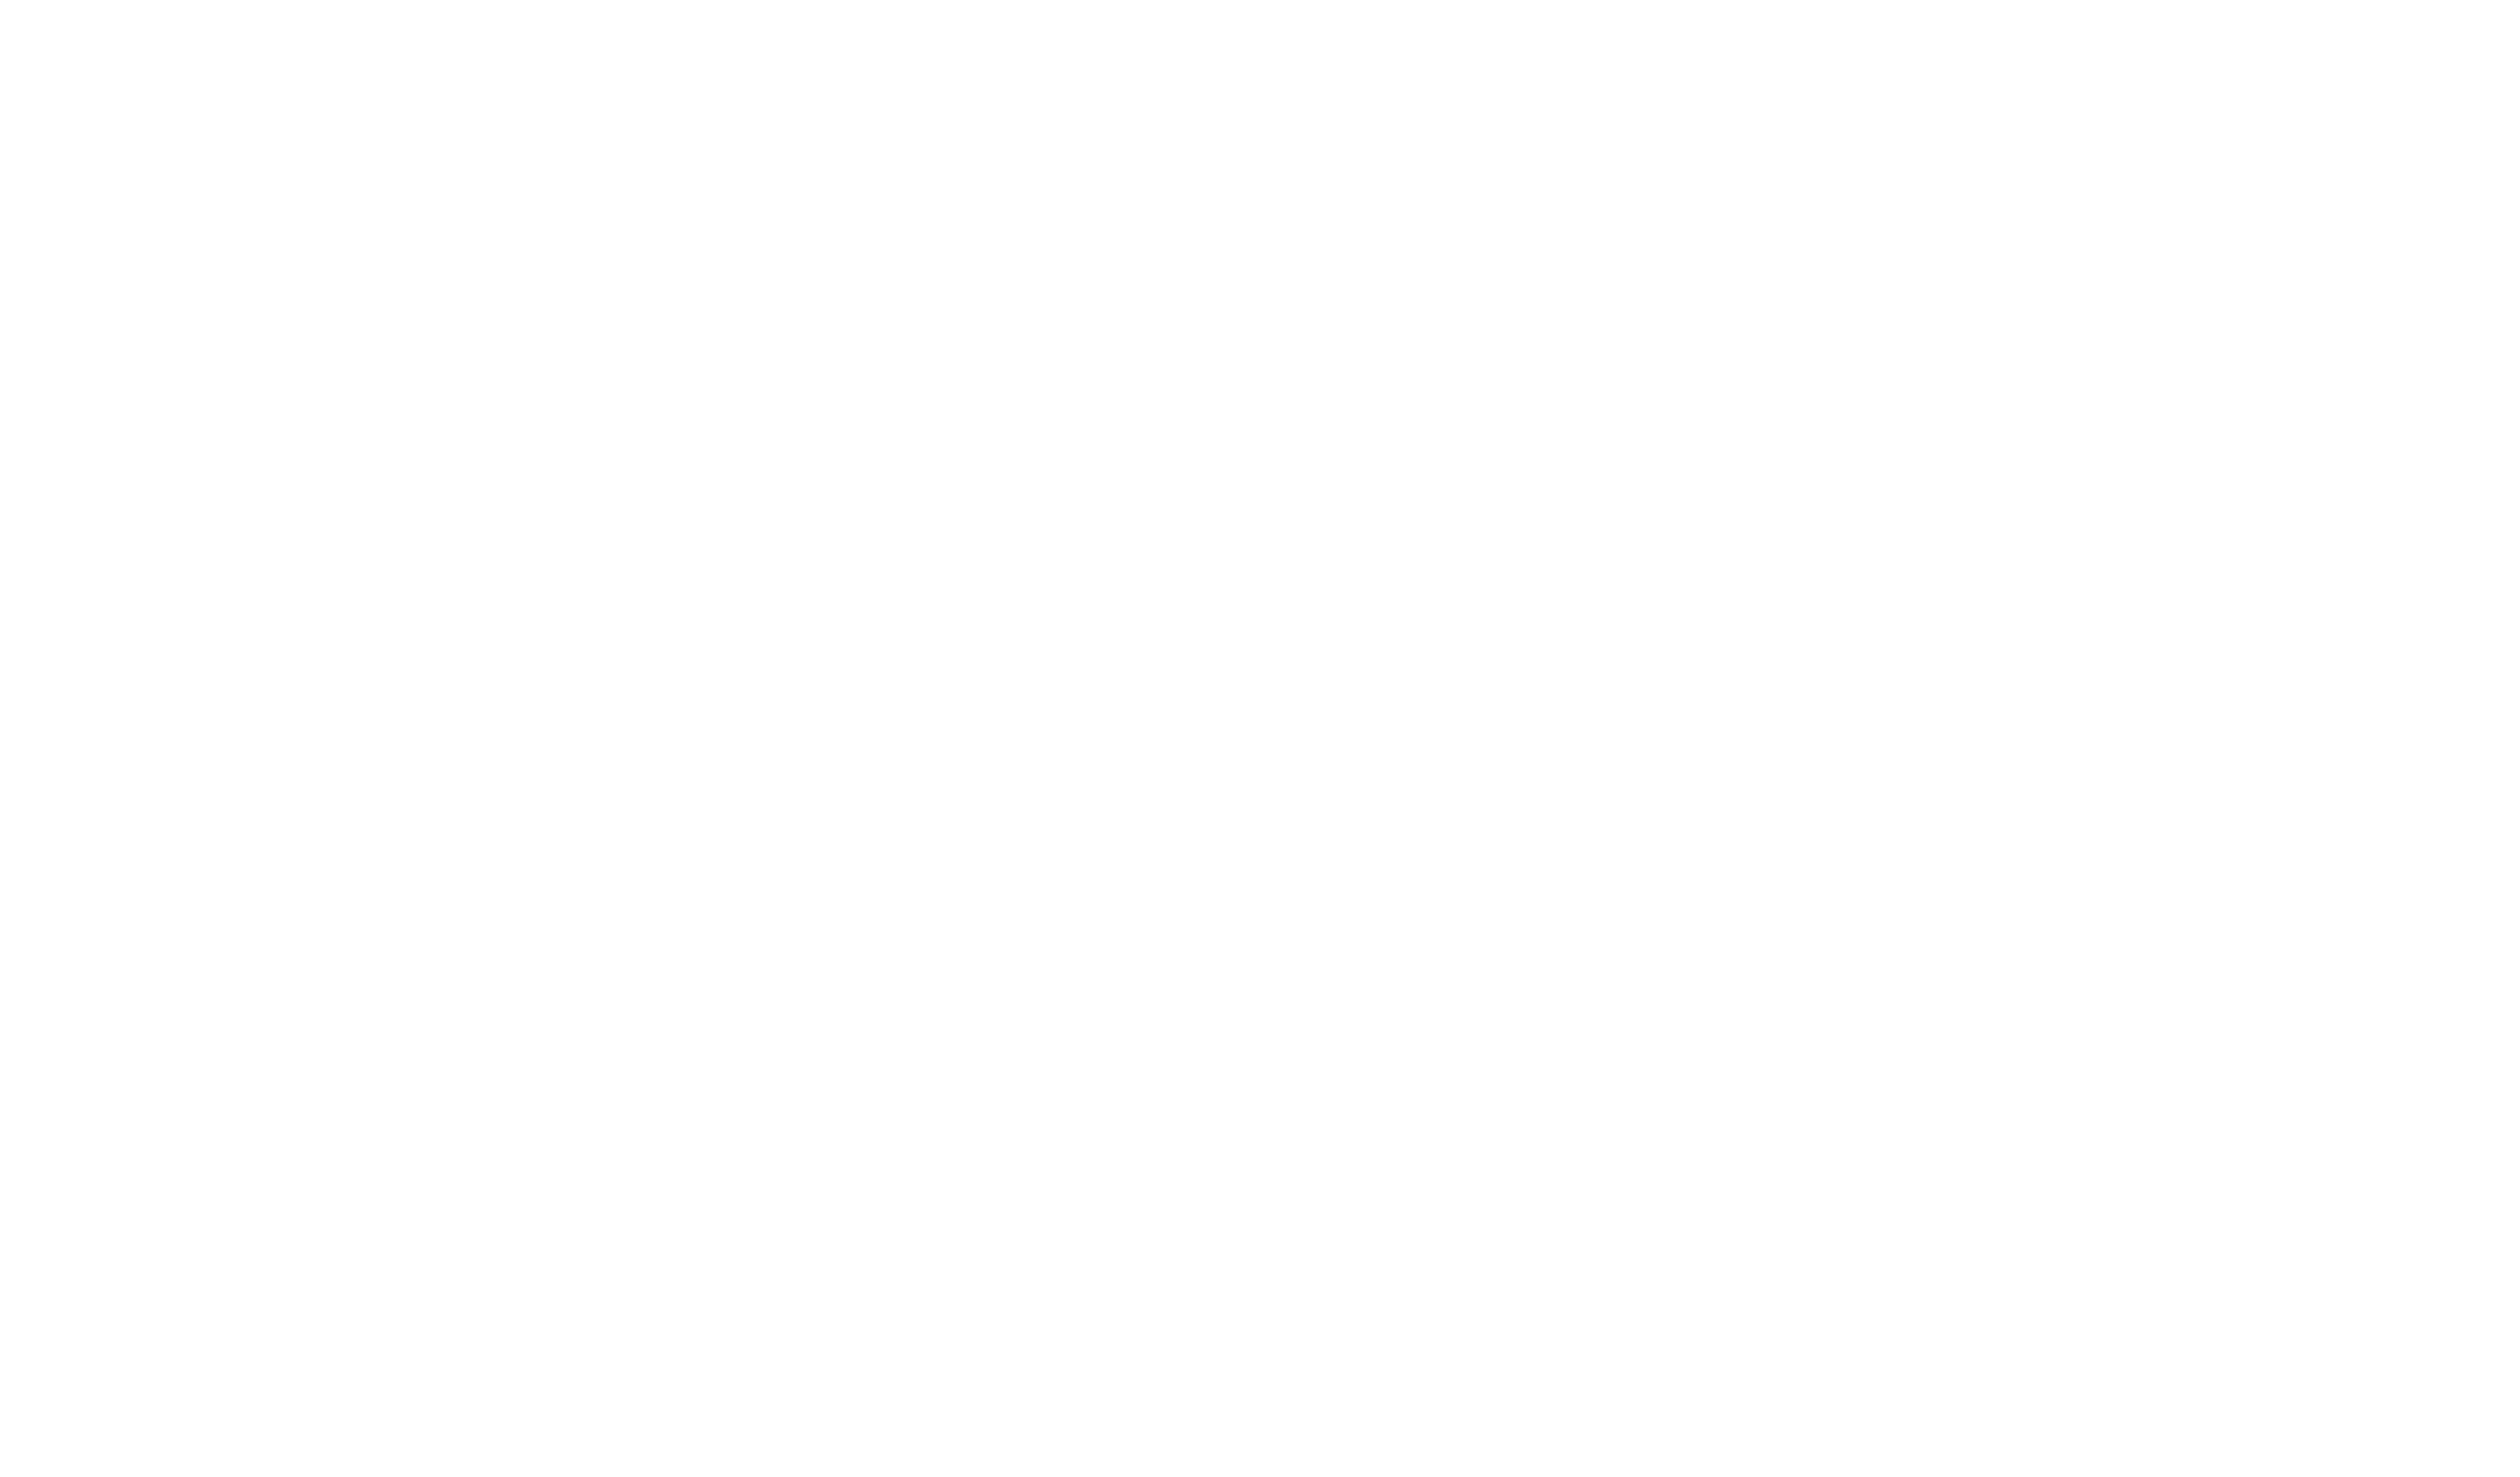

In [3]:
show(s)

This is indeed as big, empty world.

## Step 2  - add content

We now have an empty scene. We can start modelling by adding "nodes" to the scene. Node is the term used for "something" in the model. Other software may call it elements or objects.

There are many different types of Nodes.
For this model we will use three different ones.

1. A suspension point
2. A Cable
3. A Rigid-Body to model the weight
4. A liftpoint on the weight

The attachments points of the cable are Point-type nodes.

Adding a Point node to the scene is done using the following command:

In [4]:
s.new_point('Hook', position = (1,2,10))

Hook <Point>

This created a Point at global position 0,0,10
Every node in a scene needs to have a unique name, the name of this node is "Hook"

Tech: Just like the scene, our newly added Point is an *object*. The *class* of the object is Point or DAVE.scene.Point. We did not store a *reference* to this object. Luckily the scene did. The scene contains a list with all node objects that live in its world. This is why we create the object by calling a *method* of the scene object.




## Step 3 - display

We can see what is in the scene in two ways:

1. By writing the names of all elements to the screen
2. By producing a 3D plot of the scene.

Plotting the names can be done using the print_node_tree() command:

In [5]:
s.print_node_tree()

Hook [Point]


This shows that there is a single Node in the scene. The name of the node is "Hook" and its type is "Point".

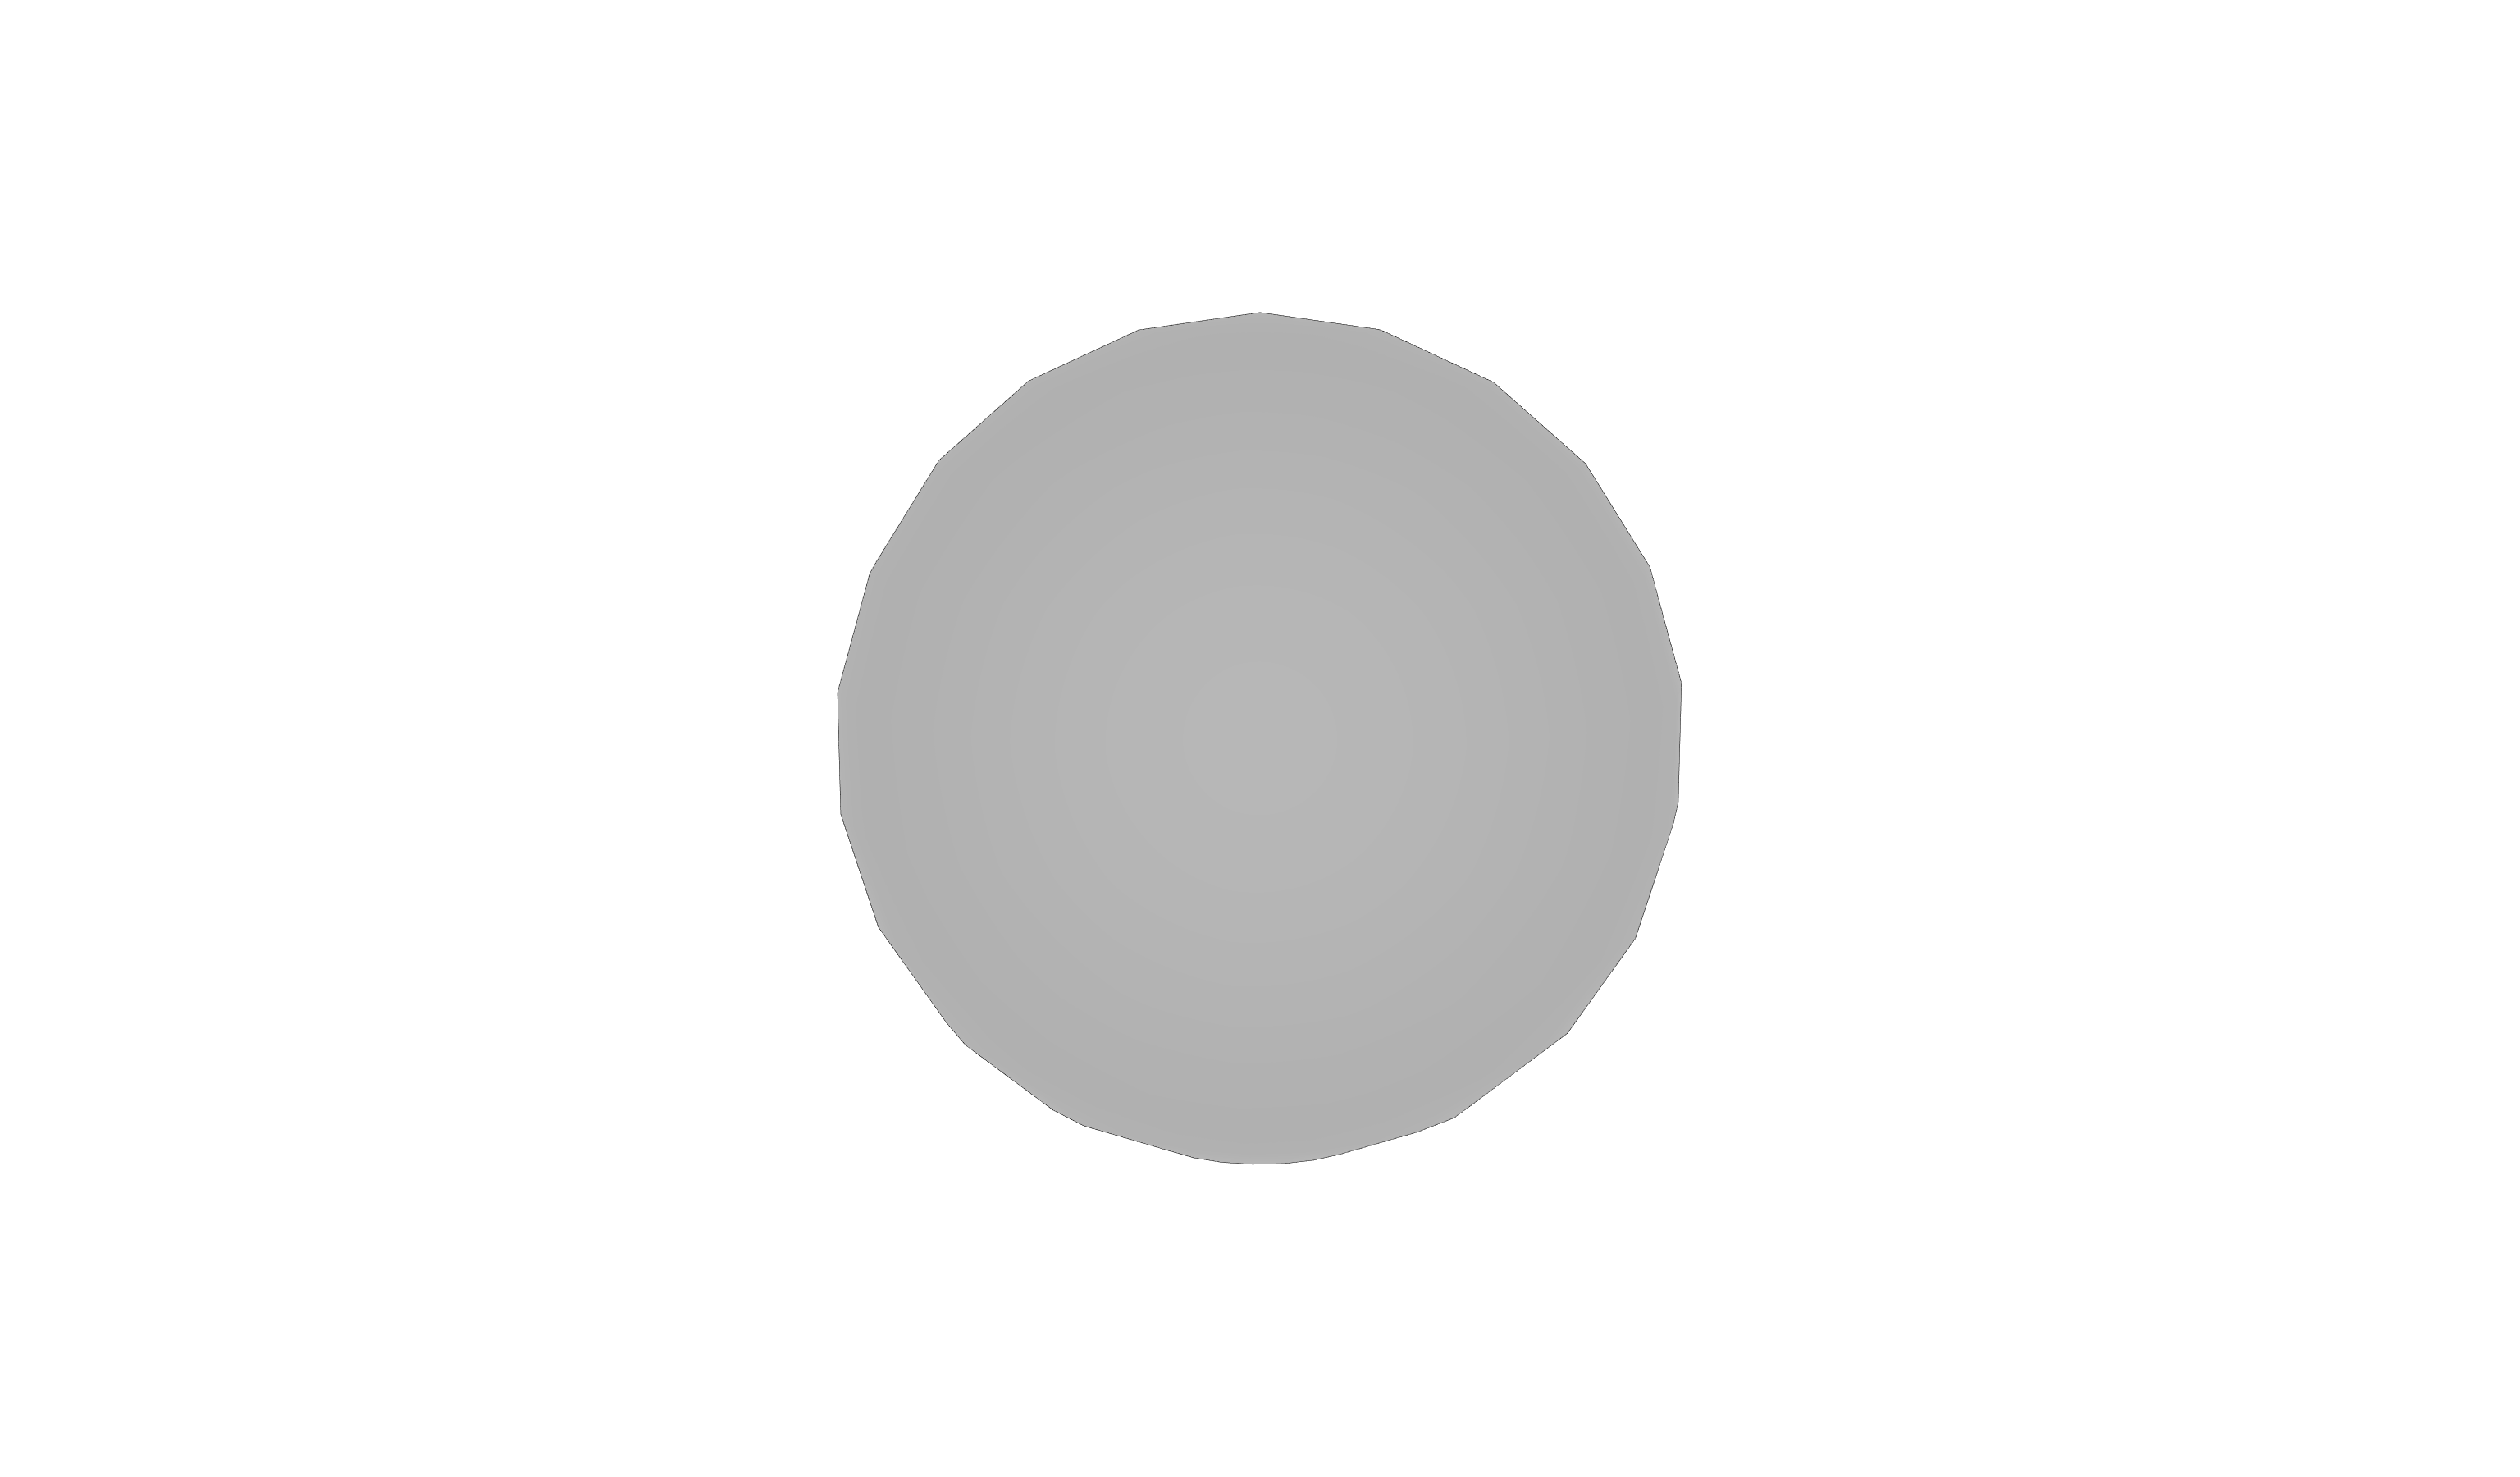

In [6]:
show(s)

The hook is now shown as a gray sphere.

Note that this plot contains the scene as it is at this moment. If we add nodes to the scene later then the plot will not automatically be updated unless we call *show* again.



# Adding the weight #

A body can be added using a rigid-body node. It can be created using the new_rigidbody method of scene.
The cog prescribes where the cog of the body is relative to its origin.
The mass is the mass in metric tonnes (1000 kg)

Fixed = False means that this body is not fixed to the world. It is free to move.

In [7]:
s.new_rigidbody('Weight', mass=1, cog = (0,0,0.5), fixed= False, position = (1,1,0) )

Weight <RigidBody>

This creates a new rigid body node with name "Weight", mass 10 and a center of gravity at 0,0,0.5
The fixed = False means that the body is free to move in all six degrees of freedom.

For clarity we define the position of the body to be x=1, y=1 and z=0. We could have omitted the position as the position of the body will be solved later by the equilibrium solver.

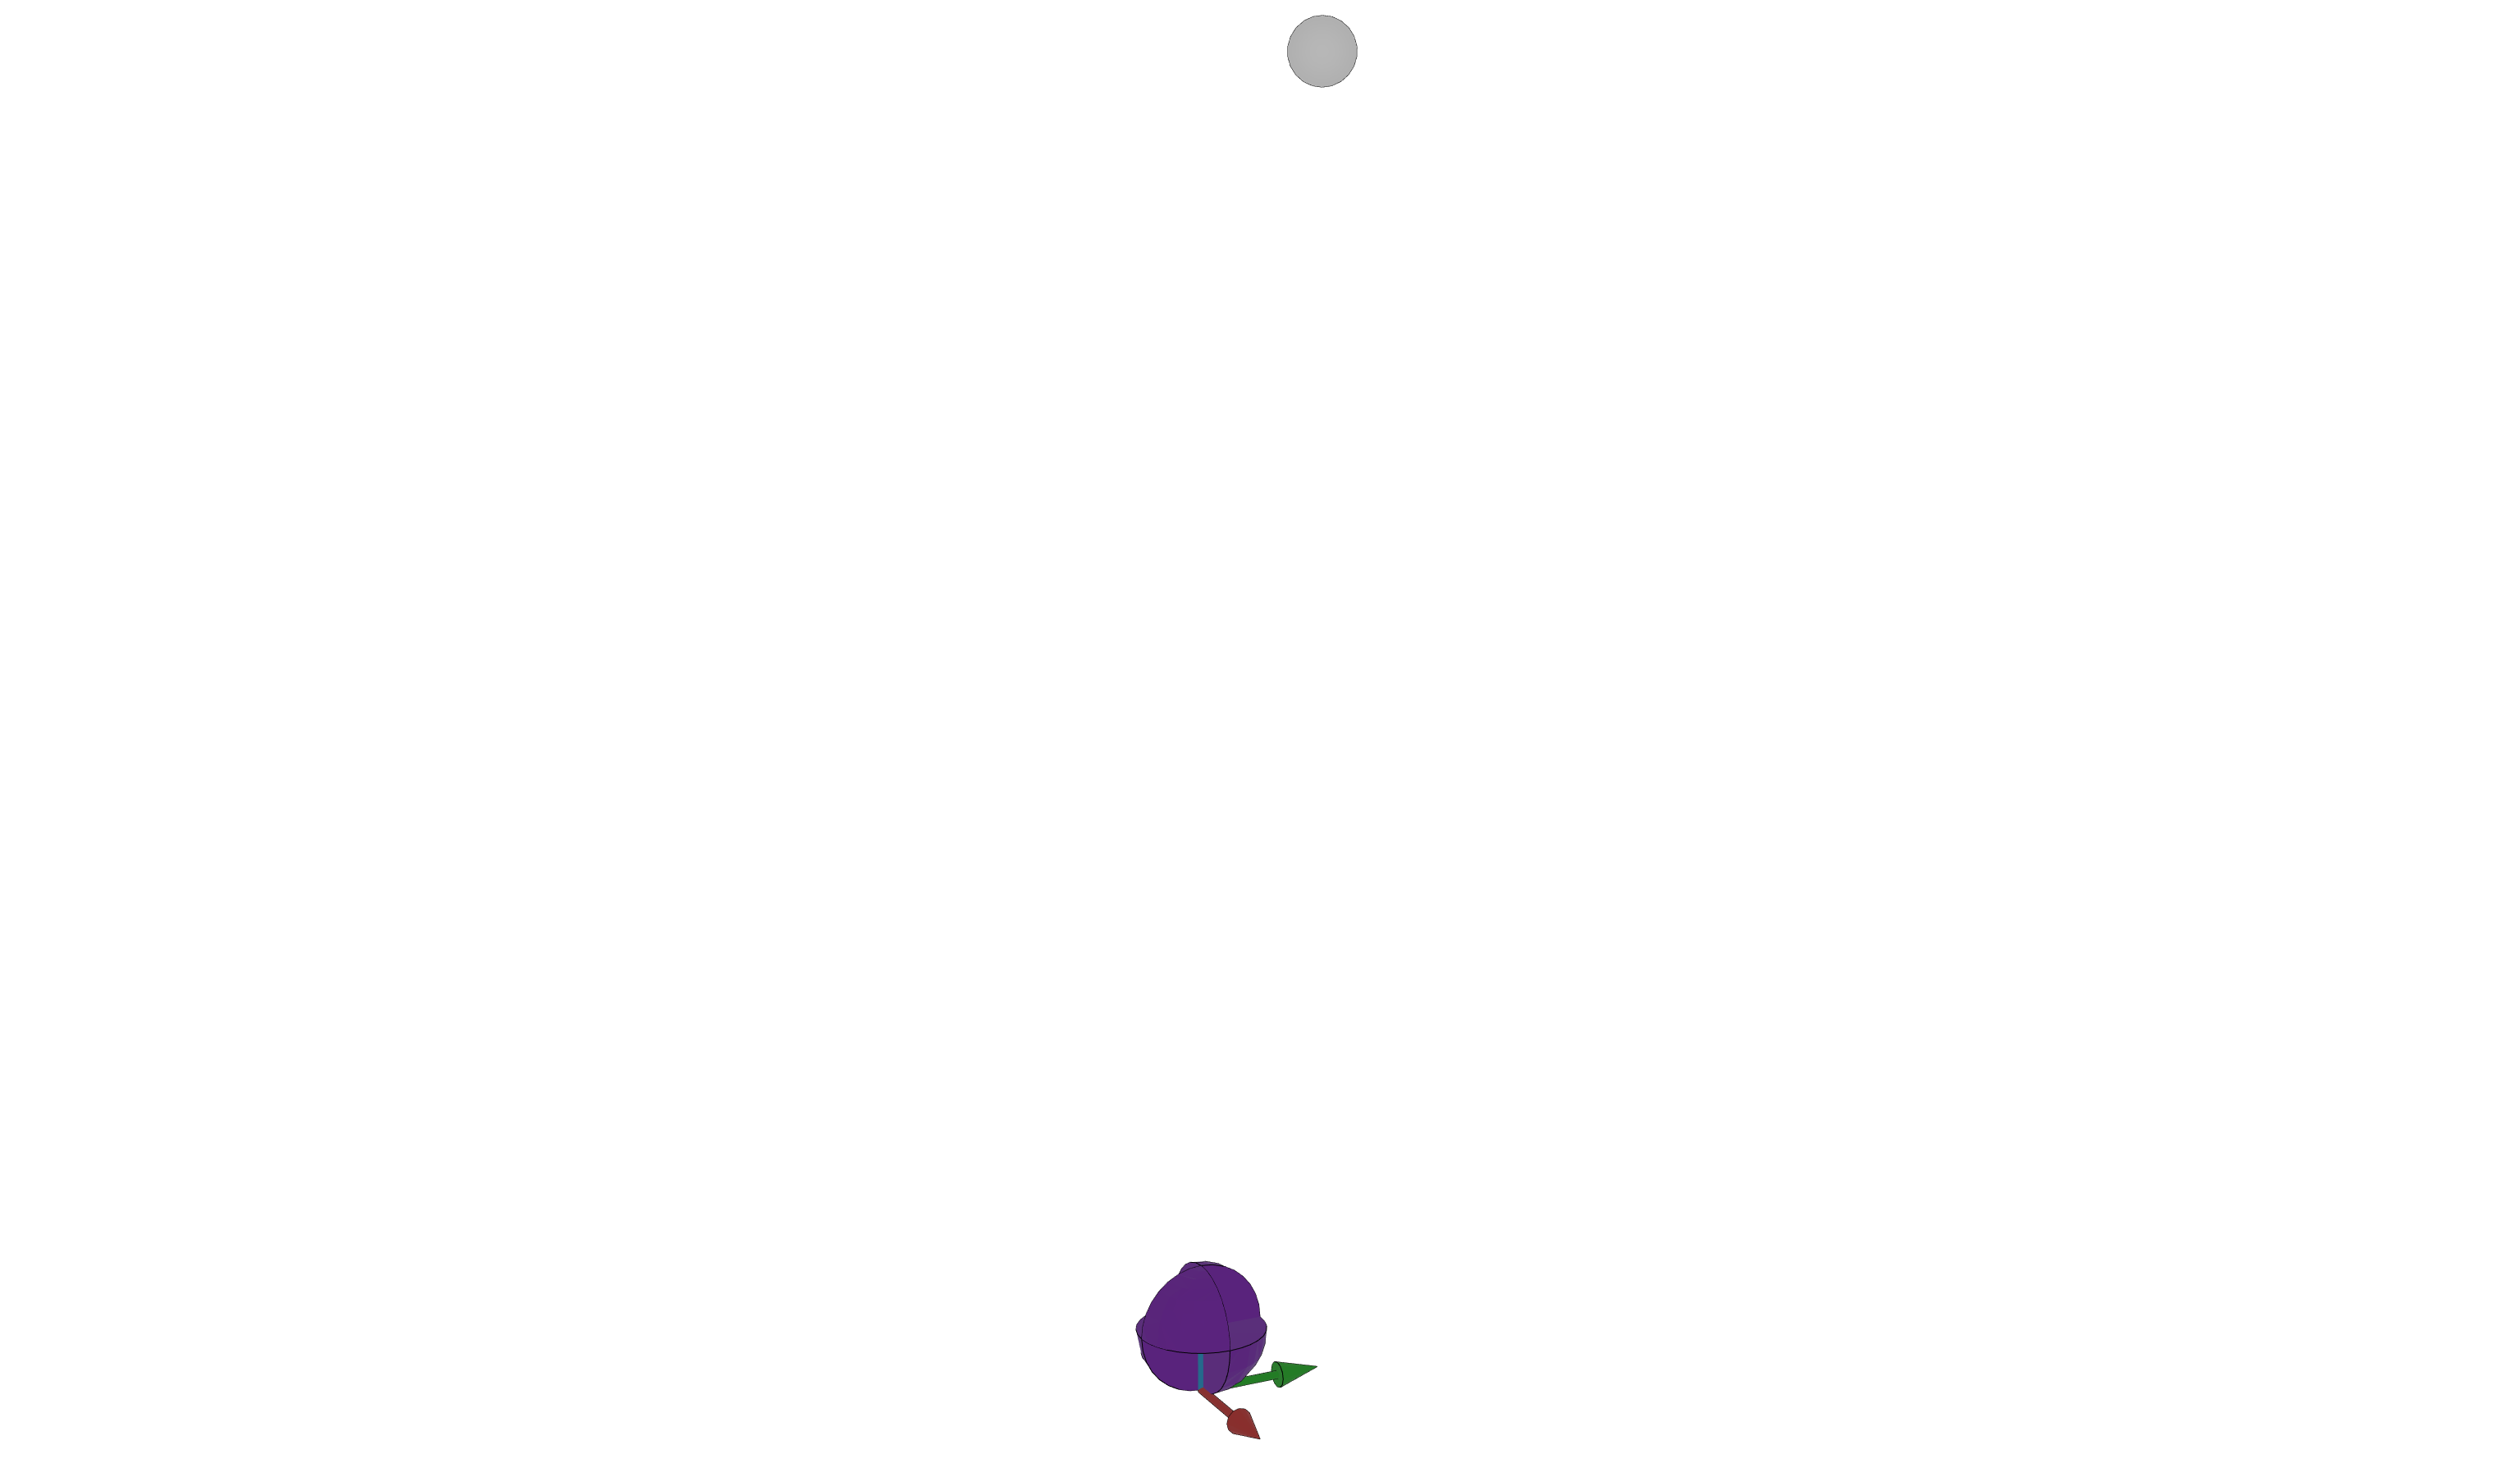

In [8]:
show(s)

The CoG of the body is shown as a purple 3D CoG symbol.
If you look closely then you see three arrows as well. They represent the origin of the body.

the origin of the body is located as global coordinates x=1, y=1 and z=0
The CoG of the body is located at x=0, y=0 and z=0.5 relative to the origin of the body.

## Local and global coordinate systems ##

It is good to realize tha the body that we just created has it own axis system. The CoG of the body is define relative to that axis system. If the body moves, then the CoG moves with it. Like it should.

### Parents

The second poi needs to be attached to the weight. To achieve that we provide the node with a "parent". If a node has a parent-node then it means that it is rigidly connected to that node. In that case the position of that node is given in the local axis system of the parent.

We provide a parent by saying parent = 'Name'. In this case the parent is 'Weight'

Let's see:

In [9]:
s.new_point('Liftpoint', parent = 'Weight', position = (1,1,0))

Liftpoint <Point>

And lets see:

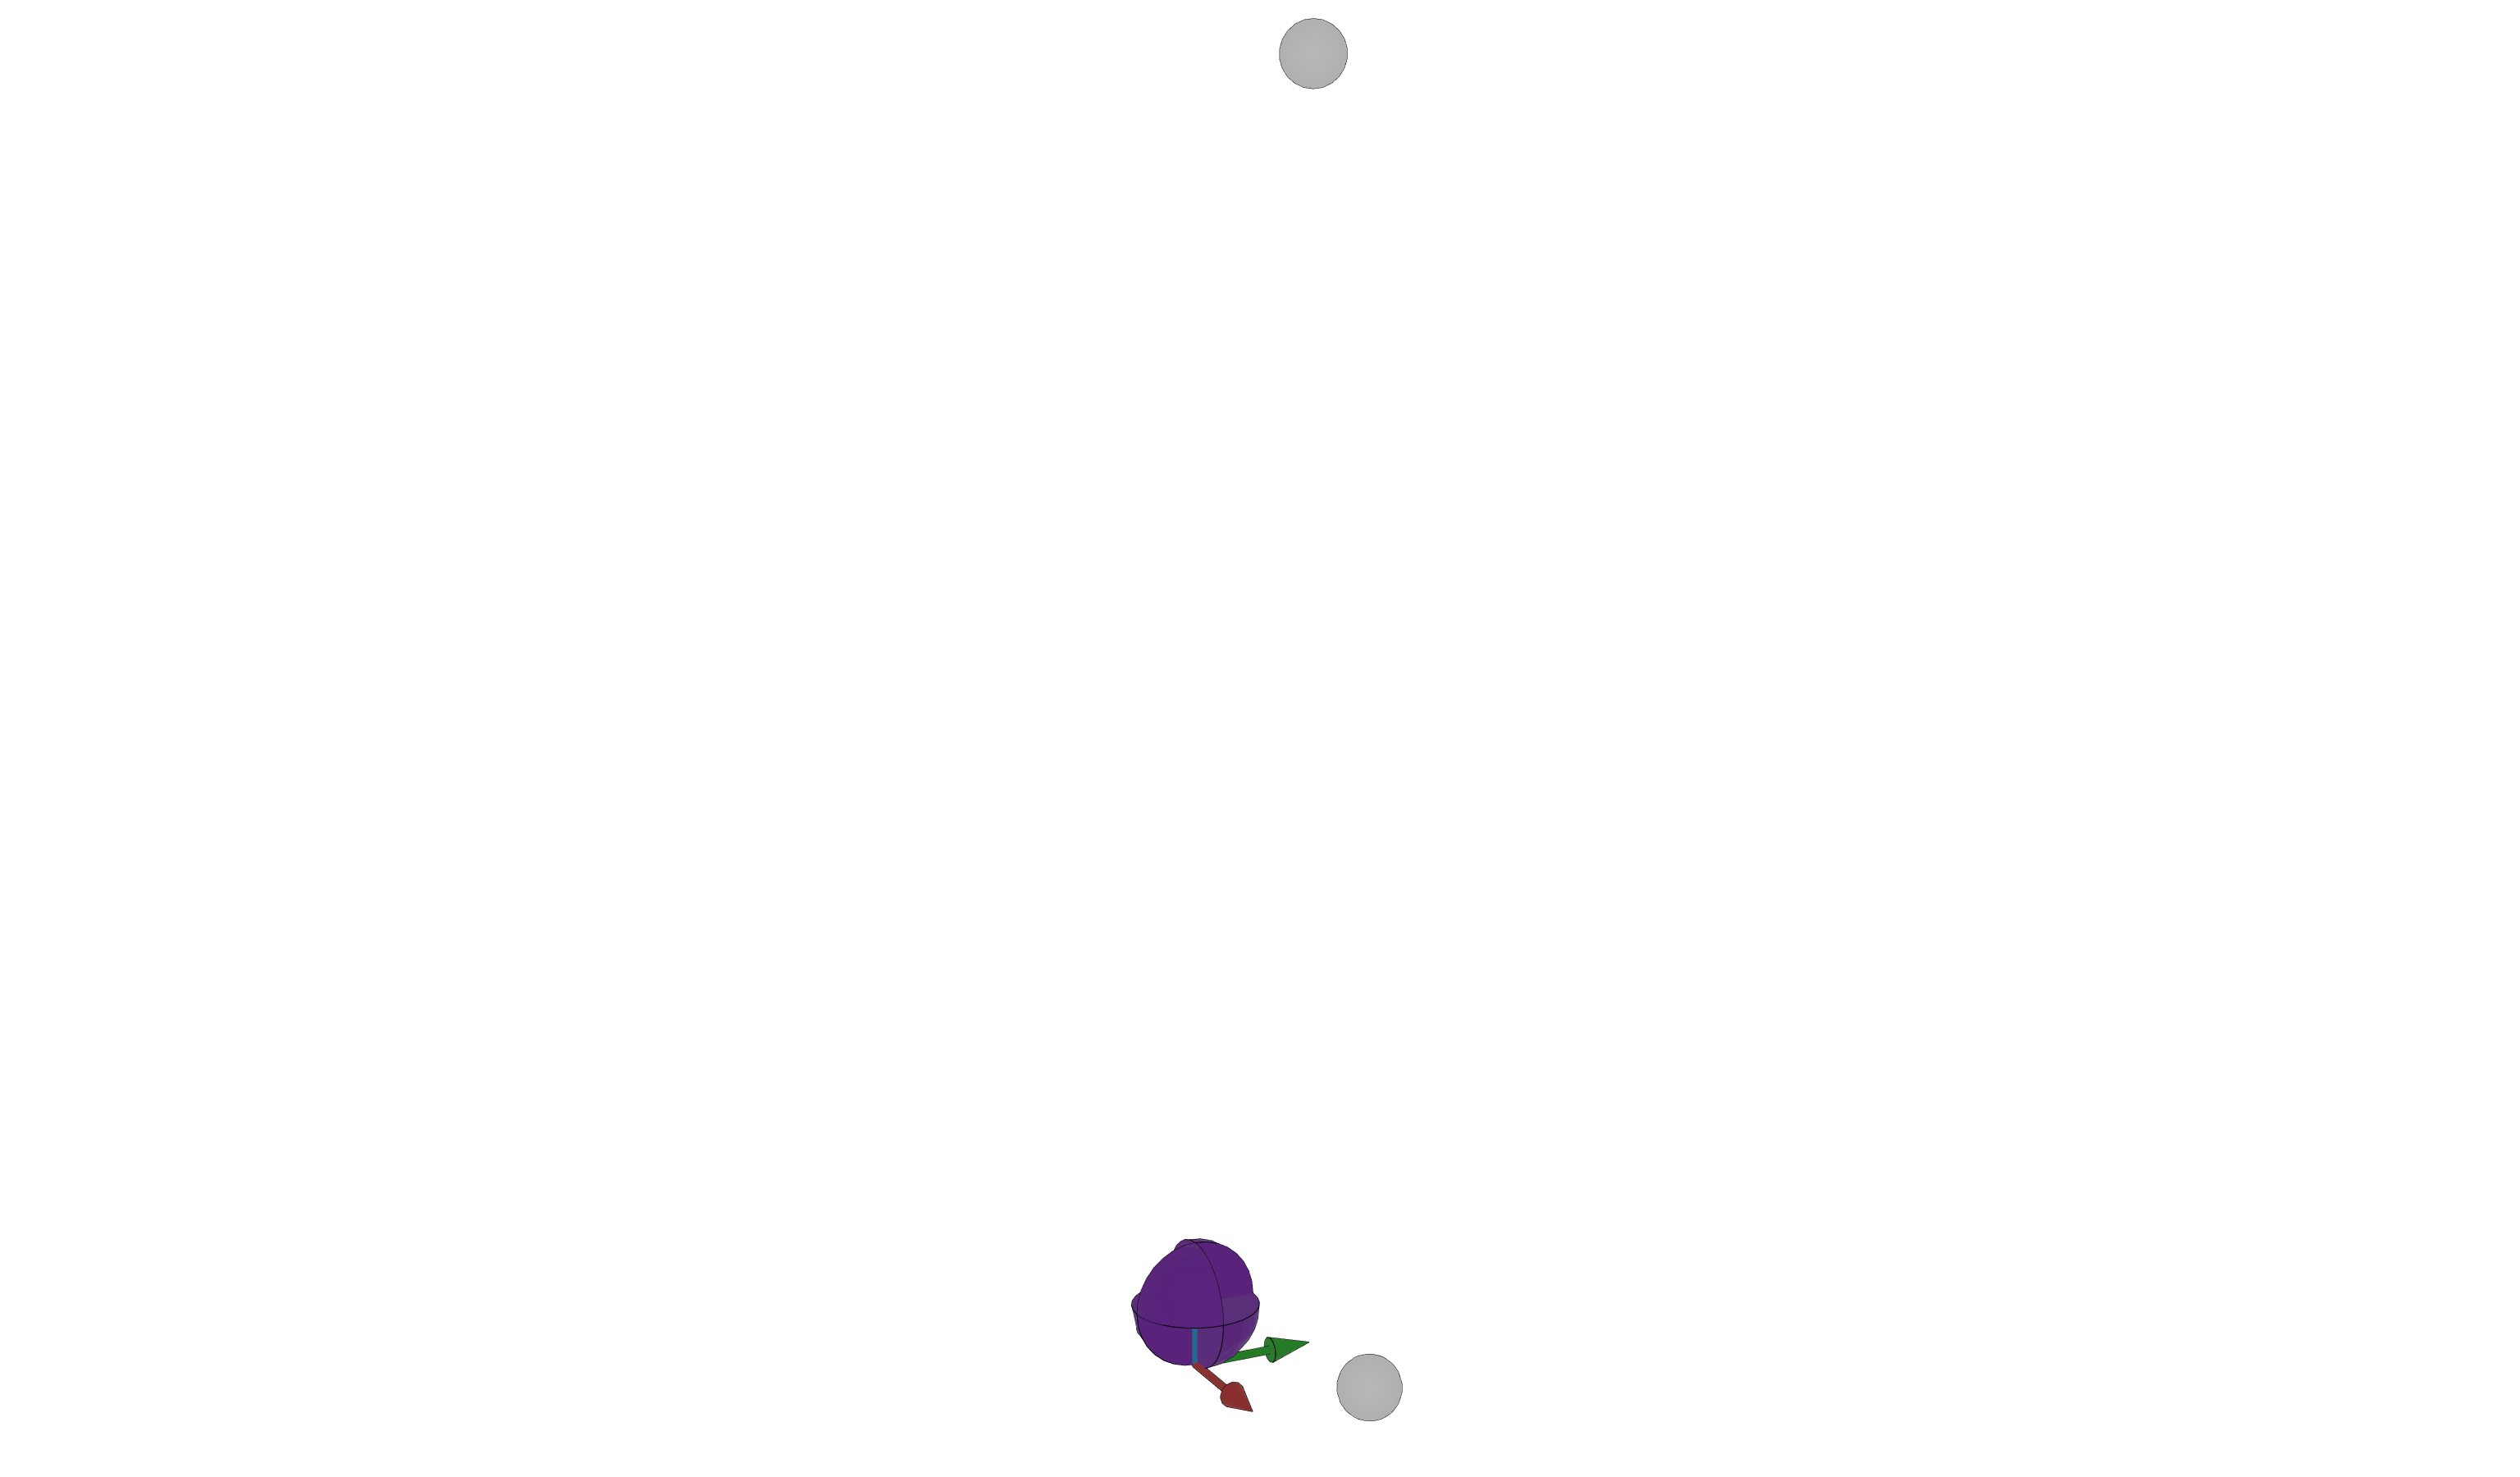

In [10]:
show(s)

Verify that the pois are where they should be.

To check if the Poi is really on the rigid-body we can use the node-tree:

In [11]:
s.print_node_tree()

Hook [Point]
Weight [RigidBody]
 |-> Liftpoint [Point]


The liftpoint is shown below Weight. This means that it is located *on* Weight

### Cable

Now we want to connect the two nodes using a cable. And, as you probably already guessed, the cable is a node and it is created using new_cable.

To specify the endpoints we use the *names* of the Points.

In [12]:
s.new_cable('Rope', endA='Hook', endB = 'Liftpoint', length= 10, EA=1000)

Rope <Cable>

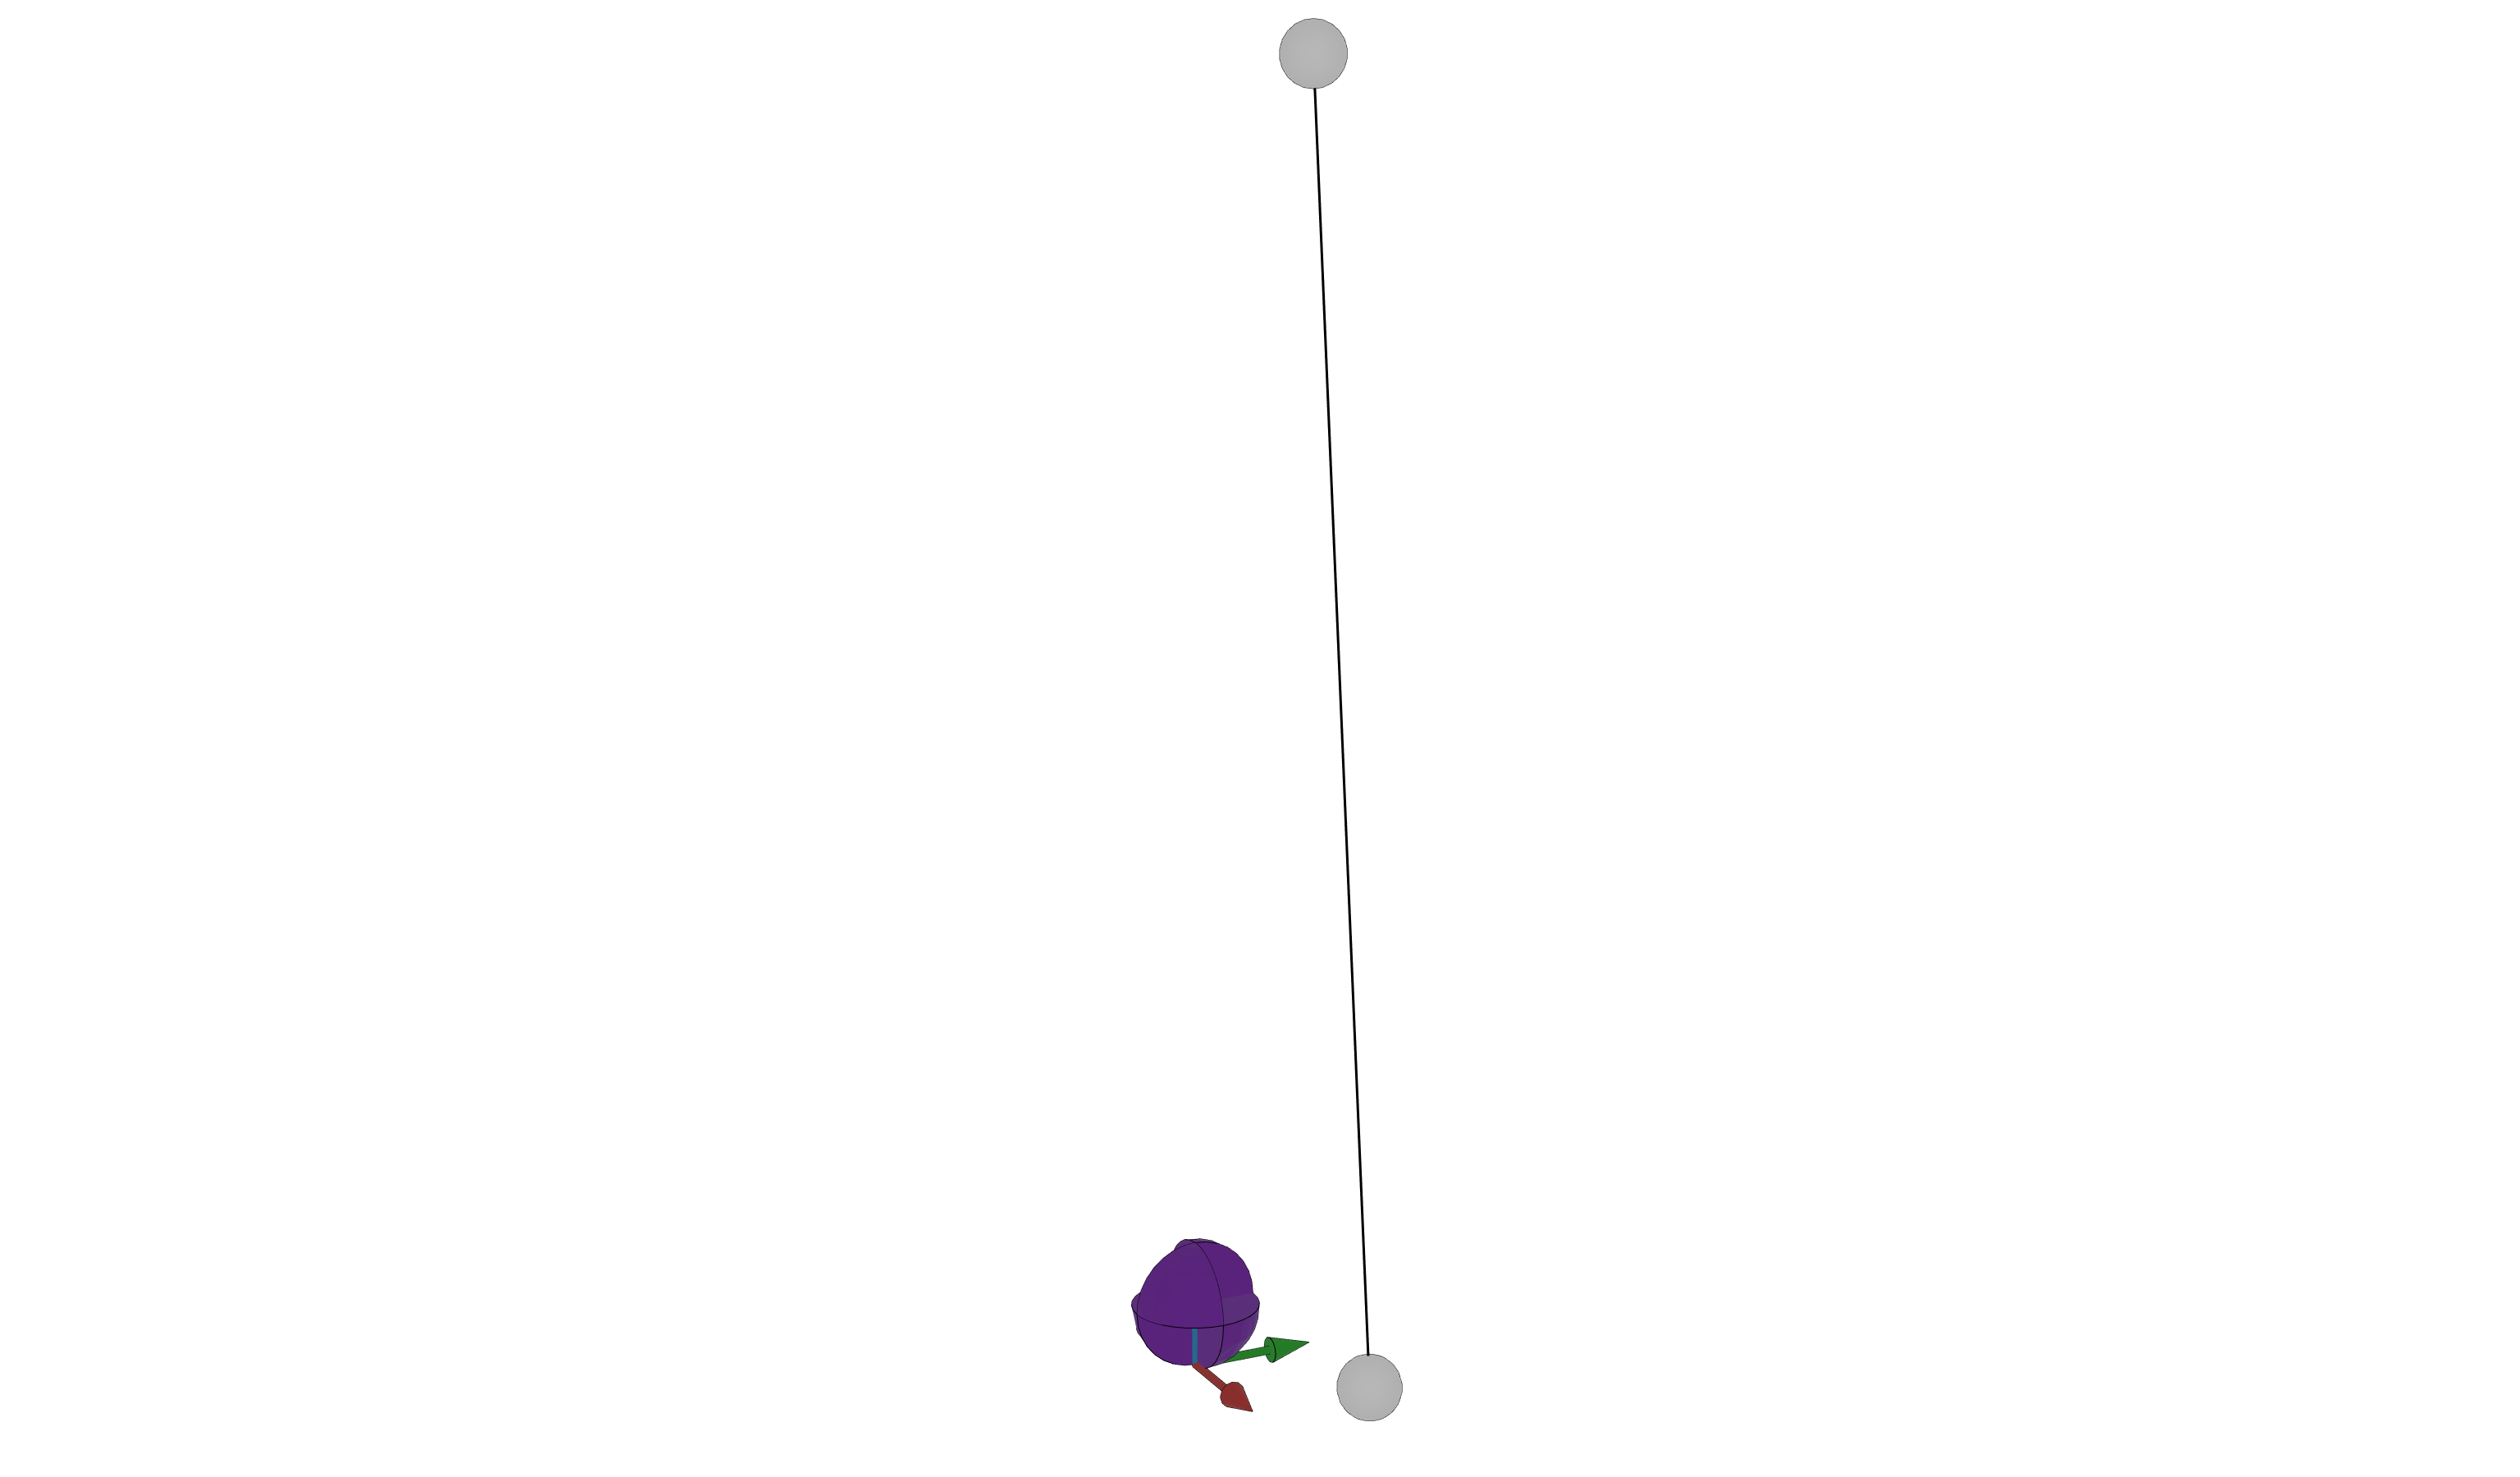

In [13]:
show(s)

That completes our model. Note that it is not in equilibrium. We will fix that in the next step.

## Solving the model

The hardest part is the easiest part. Just do:

In [14]:
s.solve_statics()

Solved to 2.656e-05 kN


True

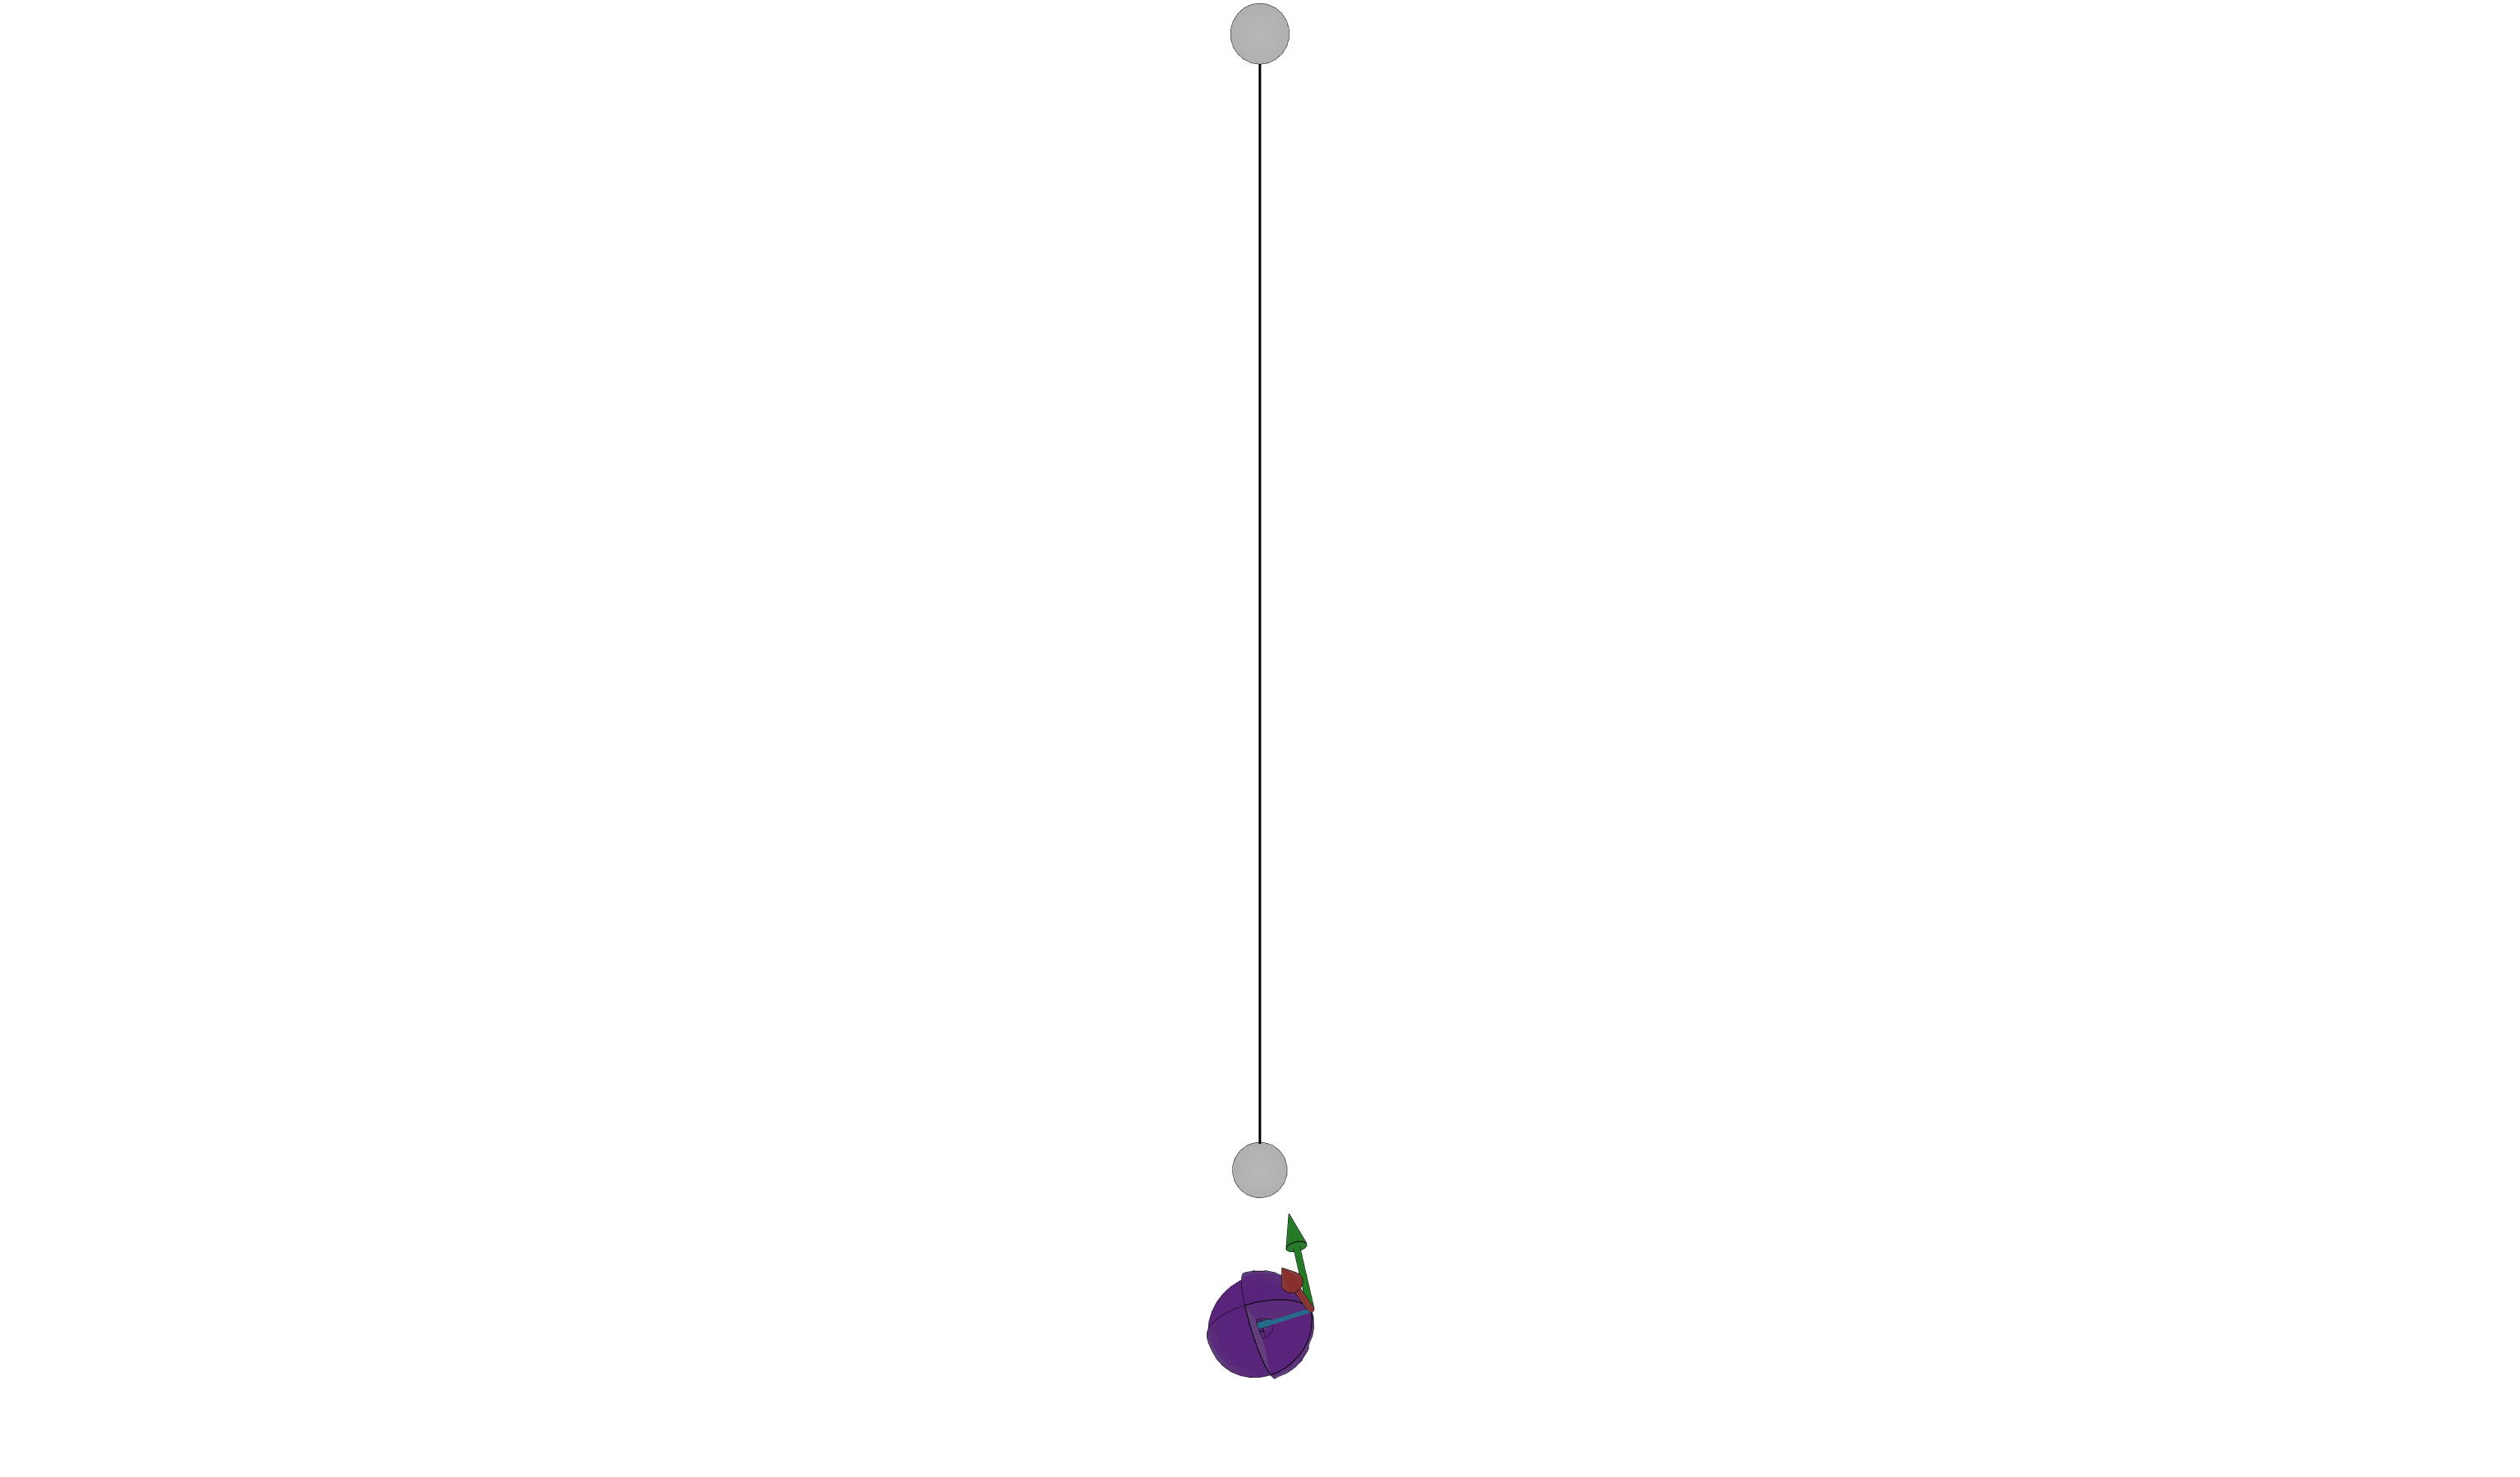

In [15]:
show(s)

Its a miracle!

# Including a screenshot

Interactive plots are nice when you are creating your model. But at some stage it need to be reported. At that moment a static screenshot with a pre-defined view is more useful. So there is an option for that as well:


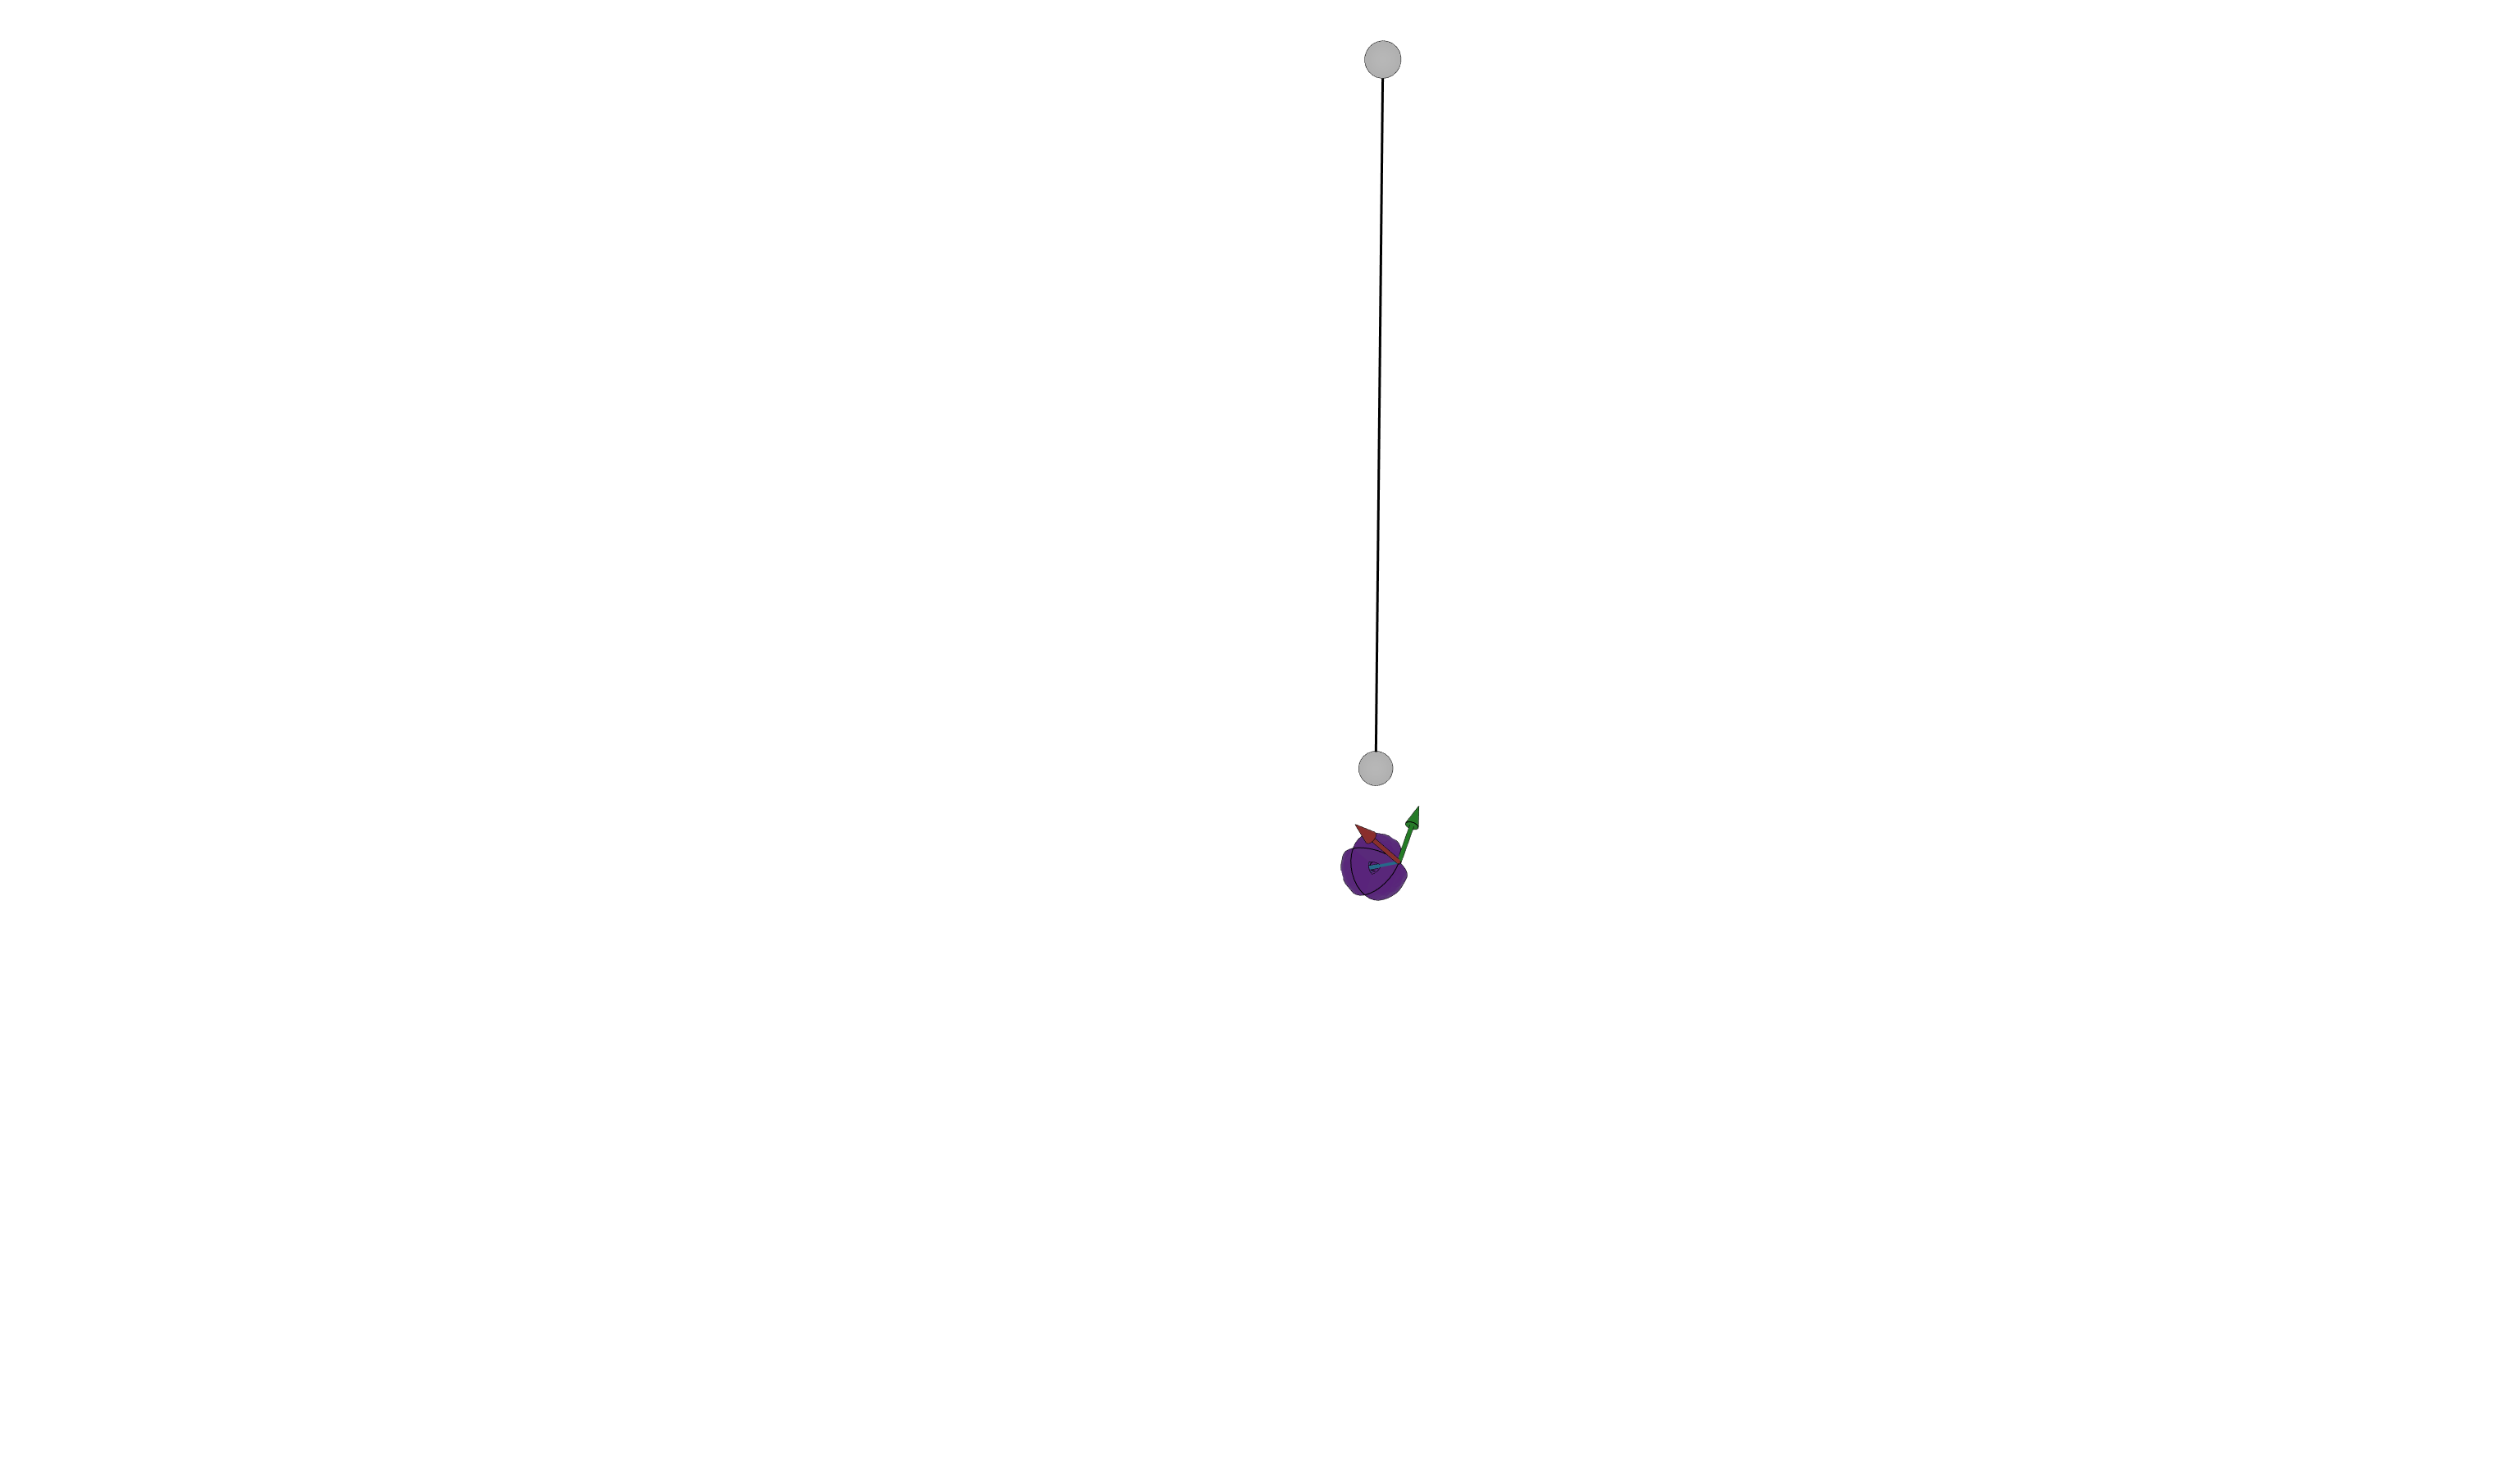

In [16]:
camera_position = (40,10,10)
camera_lookat = (0,0,0)
show(s, camera_pos=camera_position, lookat=camera_lookat)

## Getting numbers from the solved model

Plots are nice, but sometimes we need numbers. These are available.

First we need to get a reference to the node we need. We do this using s['Name of the Node'].

Once we have this, the easiest way to display all the data of that node is using re `report` function:

In [17]:
node = s['Rope']
report(node)

Property,Value,Unit,Remarks,Explained
tension,9.807,kN,,Tension in the cable
stretch,0.098,m,,Stretch of the cable
length,10.000,m,,Length of the cable when in rest
EA,1000.000,kN,,Stiffness of the cable
diameter,0.000,m,,Diameter of the cable. Used when a cable runs over a circle.
connections,"(Hook , Liftpoint )",,string,List or Tuple of nodes that this cable is connected to. Nodes may be passed by name or by reference.
name,Rope,,str,"Name of the node , must be unique"
name,Rope,,str,"Name of the node , must be unique"


<br><br>

We can also get the values using the . and then the name of the property.

Example:

In [18]:
node.tension

9.806676555503202

This can also be done in one step:

In [19]:
s['Rope'].tension

9.806676555503202

We can use math on these numbers to verify that the model result is what we would expect:

In [20]:
mass = s['Weight'].mass
tension = mass * 9.81
EA = s['Rope'].EA
L = s['Rope'].length

k = EA/L
expected_stretch = tension / k

In [21]:
print(expected_stretch)

0.0981


In [22]:
s['Rope'].stretch

0.09806676555503202

In [23]:
print(tension)

9.81


In [24]:
s['Rope'].tension

9.806676555503202

In [25]:
Liftpoint_elevation = 10 - L - expected_stretch

In [26]:
print(Liftpoint_elevation)

-0.0981


In [27]:
s['Liftpoint'].global_position

(1.000002414044157, 2.000002990719507, -0.09806676555430038)

## Modifying the model 

In this example we have set-up a mode from scratch. But what if you start with an already existing model and you only need to change it a little-bit? For example you have a ship model and you only want to slew the crane a bit. Or, to stick with the current example: What if the weight would change? Or the length of the rope?

In that case we have two options.

1. Change the weight or length in the script and run it again.
2. Modify the property we want and solve again.

The first way is the most straight forward one. But it may be difficult to embed in a work-flow and requires to make a copy of the source-model, adapt that, and then maintain the modified copy alongside with the original model.

The second option is therefore more viable in production environments. It is also really useful for parametric variation studies or when working with standard scenes. Just don't forget to solve statics again before looking at the results:

In [28]:
s['Rope'].length = 20

In [29]:
s['Rope'].stretch

0.09806676555503202

Ooops, that is still the old result!

```{admonition} Caution
When changing things in the model the equilibrium is not automatically re-calculated. This in only done when `solve_statics()` is executed.
```

In [30]:
s.solve_statics()

Solved to 1.103e-05 kN


True

In [31]:
s['Rope'].stretch

0.19613322059687377

That's better.

In [32]:
s['Liftpoint'].global_position

(0.9999998283311063, 1.9999997449636446, -10.196133220596868)

Note that not all calculated (derived) properties can be changed:  

the following will result in an error:

```
s['Rope'].stretch = 3


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-42-f7cb6e052889> in <module>
----> 1 s['Rope'].stretch = 3

AttributeError: can't set attribute
```

Attempting to do so will result in an error:
--> AttributeError: can't set attribute.

This makes sense. The idea of the whole package is that you enter everything you know - lengths, stiffness, weights - and calculate everything else - global positions, tensions, etc -.

The manual has a list of all available properties and also whether or not they are read-only.

If you ever run into a case where you happen to know the stretch and not the, say, stiffness then the package has a "goal-seek" function that can be used to solve the value of an input value to obtain a desired output. But more on that later.

This completes the first tutorial. 

### To summarize:

- Nodes are the elementary building blocks.
- Nodes are combined in a Scene to make a model.
- A new scene can be created with s = Scene()
- Nodes are added using s.new_something(Name, other properties)
- Each node has to have a unique name
- Some node-types can have a Parent. Nodes with a parent-node are connected to that node.
- Plotting in 3D is easy
- The model is not in equilibrium untill it is solved using s.solve_statics()
- Nodes can be obtain from a scene using their name using square brackets : s['Name']
- Properties can be obtained from a node using the .
- Some of the properties are read-only.